In [5]:
import numpy as np
import queue
import time
import math
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.neighbors import NearestNeighbors
def get_knn_graph(num_points, k, seedwoow):
  np.random.seed(seedwoow)
  new_points = np.random.randint(0, 10000, size=(num_points, 2))

  # Calculando os vizinhos mais próximos usando o algoritmo KNN
  knn = NearestNeighbors(n_neighbors=k)
  knn.fit(new_points)
  distances, indices = knn.kneighbors(new_points)

  # Criando o grafo no formato desejado
  graph = {}

  for i in range(len(new_points)):
      vertex = tuple(new_points[i])
      neighbors = []

      for j in indices[i]:
          if i != j:  # Evita criar uma aresta entre um vértice e ele mesmo
              neighbors.append(tuple(new_points[j]))

      graph[vertex] = neighbors

  return graph

In [6]:
def plot_graph(graph, points=None):
    # Configuração do gráfico
    plt.figure(figsize=(16, 12))
    plt.axis('on')

    # Desenho dos pontos
    for point in graph.keys():
        x, y = point
        if points is not None and point in points:
            plt.scatter(x, y, color='green')
        else:
            plt.scatter(x, y, color='blue')
        #plt.text(x, y, f'({x}, {y})', fontsize=10, ha='center', va='bottom')

    # Desenho das arestas
    for node, edges in graph.items():
        x1, y1 = node
        for edge in edges:
            x2, y2 = edge
            plt.plot([x1, x2], [y1, y2], color='red')

    # Configurações do gráfico
    plt.title('KNN - Vértices Conectados')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.grid(True)

    # Exibição do gráfico
    plt.show()

In [7]:
import matplotlib.pyplot as plt

def plot_result_new(graph, path, all_paths):
    # Configuração do gráfico
    plt.figure(figsize=(18, 12))
    plt.axis('on')

    # Desenho das arestas
    for node, edges in graph.items():
        for edge in edges:
            plt.plot([node[0], edge[0]], [node[1], edge[1]], color='grey')

    # Desenho dos pontos
    for point in graph.keys():
        if point in all_paths:
            plt.scatter(*point, color='blue')
        else:
            plt.scatter(*point, color='red')

    # # Desenho das arestas dos caminhos
    # for node, edges in all_paths.items():
    #     for edge in edges:
    #         plt.plot([node[0], edge[0]], [node[1], edge[1]], color='yellow')

    # Configurações do gráfico
    for i in range(len(path) - 1):
        node = path[i]
        next_node = path[i + 1]
        plt.scatter(*node, color='black')
        plt.text(node[0], node[1] - 1, str(node), ha='center', color='black')
        plt.plot([node[0], next_node[0]], [node[1], next_node[1]], color='red', linewidth=5.0)

    plt.title('KNN - Vértices Conectados')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.grid(True)
    # Exibição do gráfico
    plt.show()


In [54]:
import math

def calculate_path_distance(path):
    total_distance = 0

    for i in range(len(path) - 1):
        current_point = path[i]
        next_point = path[i + 1]

        distance = math.sqrt((next_point[0] - current_point[0])**2 + (next_point[1] - current_point[1])**2)
        total_distance += distance

    return total_distance


In [3]:
from math import sqrt
from heapq import heappop, heappush

def greedy_best_first_search(graph, start, goal):
    def heuristic(node):
        return sqrt((node[0] - goal[0]) ** 2 + (node[1] - goal[1]) ** 2)
    
    frontier = [(heuristic(start), start)]
    visited = []
    paths = {start: [start]}
    
    while frontier:        
        result_list = []
        for _, item in frontier:
            result_dict = {item: []}
            
            for _, neighbor in frontier:
                if neighbor != item:
                    result_dict[item].append(neighbor)
            
            result_list.append(result_dict)

        _, current_node = heappop(frontier)
        
        if current_node == goal:            
            return paths[current_node], visited, paths, result_list
        
        visited.append(current_node)
        
        for neighbor in graph[current_node]:
            if neighbor not in paths:
                new_path = paths[current_node] + [neighbor]
                paths[neighbor] = new_path
                heappush(frontier, (heuristic(neighbor), neighbor))
    
    return None, visited, paths

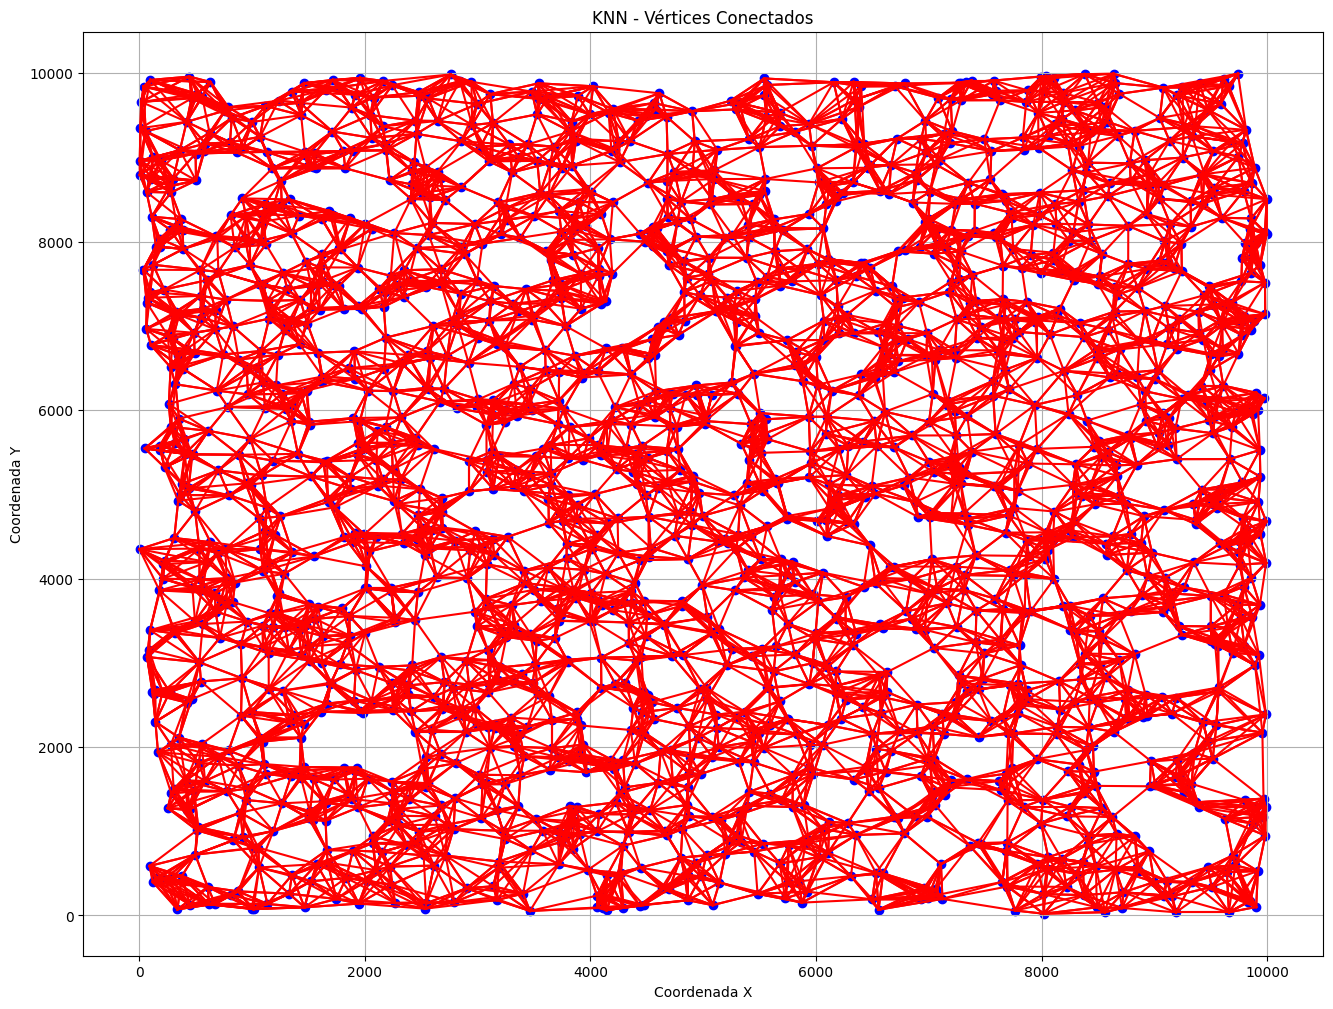

In [ ]:
plot_graph(graph)

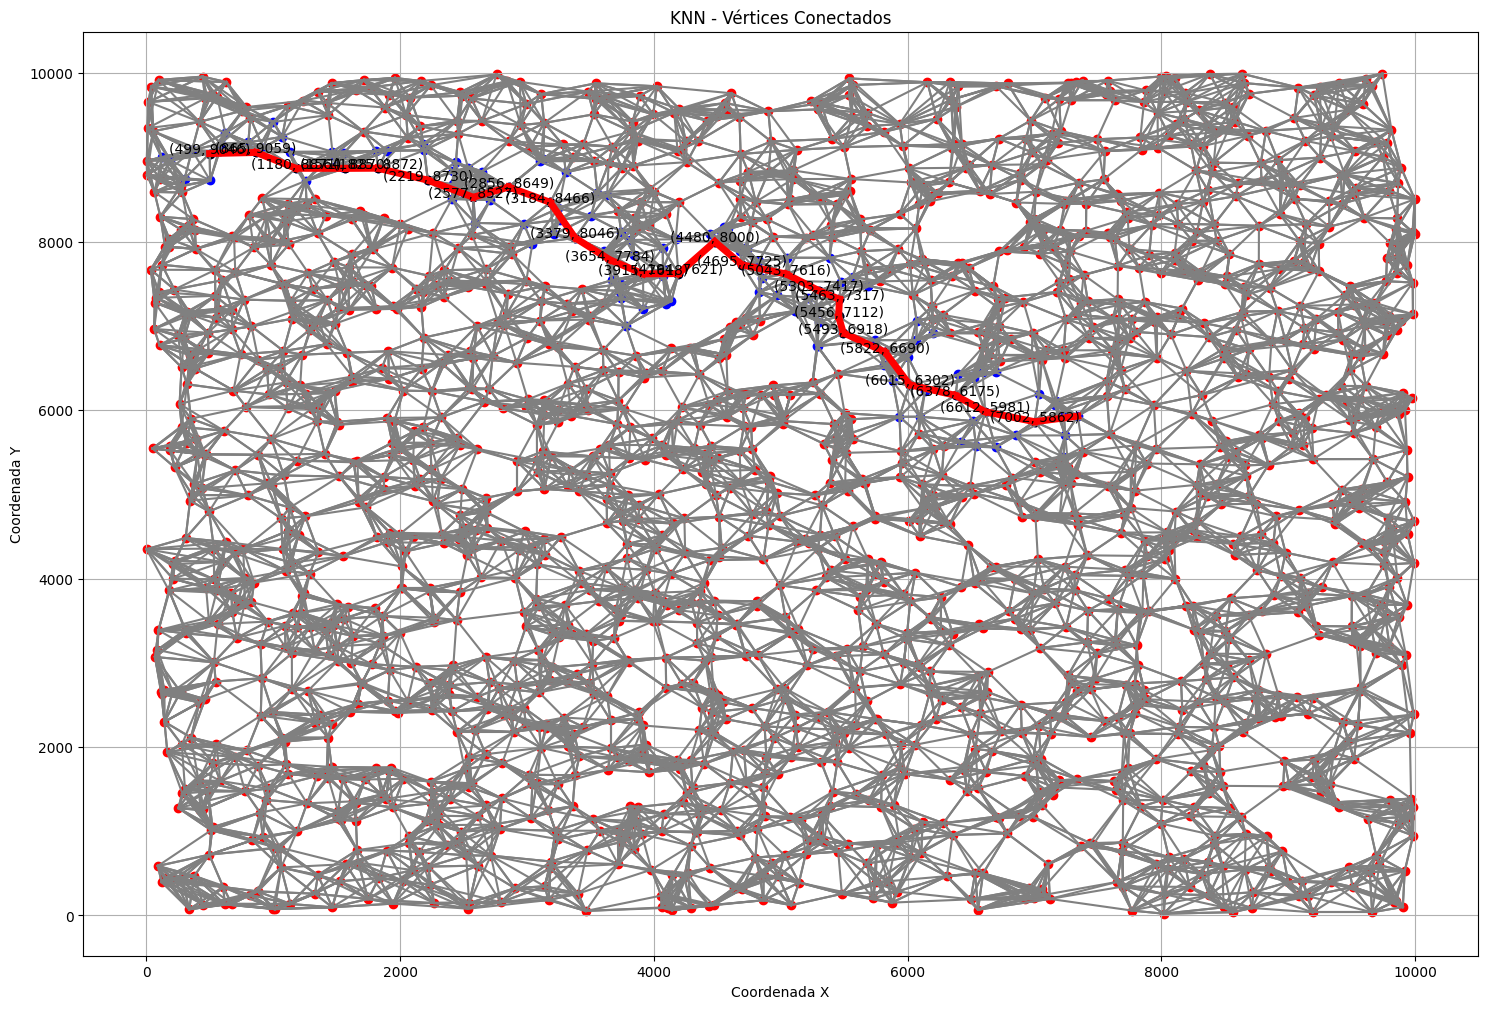

In [ ]:
plot_result_new(graph, path, all_paths)

In [8]:
k = 12
seed = 13
search = 'bfgreedy'

In [66]:
def test(executions, k):
    results = []
    graph = get_knn_graph(2000, k, seed)
    for i, execution in enumerate(executions):
        start_time = time.time()
                
        path, visited, all_paths, result_list = greedy_best_first_search(graph, execution[0], execution[1])

        elapsed_time = time.time() - start_time

        if path is not None:
          results.append([
              str(i+1), #nro execução
              str(search), # sigla algoritmo de busca
              str(k-1), # quantidade de vizinhos
              str(seed), # seed aleatoria
              str(execution[0]), # nó origem
              str(execution[1]), # nó destino
              str(round(elapsed_time, 7)), # tempo gasto
              str(round(calculate_path_distance(path), 3)), #distancia euclidiana
              str(len(path)), # nro de nós até chegar ao destino
              str(120) # nro de nós visitados no total
          ])
        else:
            print("Não há caminho alcançável entre os nós de origem e destino.")

    return results

In [58]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

def escreveNaTabela(results):
  spreadsheet = gc.open('Execuções Algoritmos de Busca')
  sheet = spreadsheet.worksheet('Execuções')

  for row in results:
    sheet.append_row(row)

In [67]:
# exemplos K=3
execution1 = [(9488, 5880), (8564, 9598)]
execution2 = [(6094, 5922), (7183, 5343)]
execution3 = [(2881, 2367), (3722, 6447)]
execution4 = [(8536, 3285), (8428, 3559)]
execution5 = [(4710, 1963), (5792, 4198)]
execution6 = [(1945, 141), (3712, 5834)]
execution7 = [(8603, 6388), (7864, 9658)]
execution8 = [(3320, 2774), (3876, 3771)]
execution9 = [(3320, 2774), (3876, 3771)]
execution10 = [(5624, 2898), (4458, 2414)] 

executionsk3 = [execution1, execution2, execution3, execution4, execution5, execution6, execution7, execution8, execution9, execution10]
escreveNaTabela(test(executionsk3, 4))

# exemplos K=7
execution11 = [(4500, 6121), (7195, 1604)]
execution12 = [(4000, 4408), (91, 588)]
execution13 = [(8037, 9967), (377, 5124)]
execution14 = [(4993, 3921), (7960, 1856)]
execution15 = [(3531, 2629), (8690, 4984)]
execution16 = [(38, 9841), (4219, 9099)]
execution17 = [(38, 9841), (4219, 9099)]
execution18 = [(127, 2626), (4365, 3708)]
execution19 = [(9927, 3093), (2894, 2180)]
execution20 =  [(3847, 9224), (9829, 4439)]

executionsk7 = [execution11, execution12, execution13, execution14, execution15, execution16, execution17, execution18, execution19, execution20]
escreveNaTabela(test(executionsk7, 8))

# exemplos K=12
execution21 = [(447, 130), (1490, 7028)]
execution22 = [(1427, 7307), (1521, 7211)]
execution23 = [(8178, 672), (4, 8961)]
execution24 = [(121, 9000), (142, 440)]
execution25 = [(8563, 39), (516, 9755)]
execution26 = [(121, 9000), (8563, 39)]
execution27 = [(9920, 6004), (5060, 8442)]
execution28 = [(8464, 1707), (1326, 3148)]
execution29 = [(3741, 3894), (3756, 4684)]
execution30 = [(3756, 4684), (4270, 500)]

executionsk12 = [execution21, execution22, execution23, execution24, execution25, execution26, execution27, execution28, execution29, execution30]
escreveNaTabela(test(executionsk12, 12))